In [1]:
import pandas as pd
import numpy as np
import colorsys as cs
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from mpl_toolkits import mplot3d
import math

In [15]:
dfColours = pd.read_csv("../data/clean/Colours.csv")
dfColours.head()

,Name0,Desc1,Desc2,Name1,HEX,R,G,B,Hue,Sat,Lum
0,black,Black,Black,Black,#000000,0,0,0,0.0,0.0,0.0
1,red,medium dark red,Dark red,Deep maroon,#820000,130,0,0,0.0,100.0,25.5
2,red,medium dark red,Dark red,Deep red,#850101,133,1,1,0.0,98.5,26.3
3,red,medium dark red,Dark red,Blood,#8a0303,138,3,3,0.0,95.7,27.6
4,red,medium dark red,Dark red,Darkred,#8B0000,139,0,0,0.0,100.0,27.3


In [8]:
dfColours['Name0'].value_counts()

brown     391
purple    320
grey      308
pink      295
blue      261
green     251
red       155
yellow    117
orange    107
black      62
cyan       48
white      36
Name: Name0, dtype: int64

In [112]:
for i, row in dfColours.iterrows():
    H, L, S = cs.rgb_to_hls(float(row.R)/255., float(row.G)/255., float(row.B)/255.)
    dfColours.loc[i,'Hue'],dfColours.loc[i,'Sat'],dfColours.loc[i,'Lum'] = H*360, S*100, L*100

In [113]:
dfColours.to_csv("Colours.csv", index=False)
dfColours.head()

,Name0,Name1,Name2,HEX,R,G,B,Hue,Sat,Lum,X,Y
0,red,red,lightsalmon,#FFA07A,255.0,160.0,122.0,17.142857,100.000000,73.921569,0.217888,0.706374
1,red,red,salmon,#FA8072,250.0,128.0,114.0,6.176471,93.150685,71.372549,0.076790,0.709582
2,red,red,darksalmon,#E9967A,233.0,150.0,122.0,15.135135,71.612903,69.607843,0.181744,0.671933
3,red,red,lightcoral,#F08080,240.0,128.0,128.0,0.000000,78.873239,72.156863,0.000000,0.721569
4,red,red,Scarlet,#FF2400,255.0,36.0,0.0,8.470588,100.000000,50.000000,0.073651,0.494546


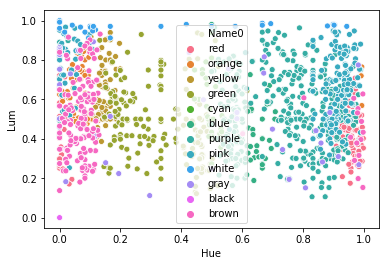

In [97]:
sns.scatterplot(x='Hue', y='Lum', hue='Name0', data=dfColours)

Text(0.5, 0, 'Lum')

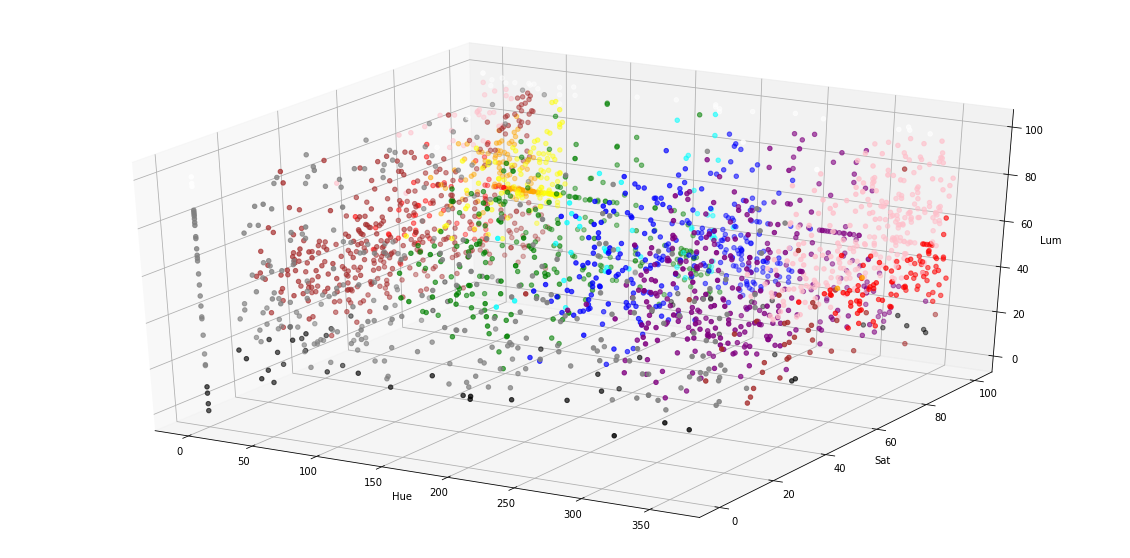

In [9]:
plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
ax.scatter3D(dfColours['Hue'], dfColours['Sat'], dfColours['Lum'], c=dfColours['Name0'])

ax.set_xlabel('Hue')
ax.set_ylabel('Sat')
ax.set_zlabel('Lum')

## Plot HLS
Calculate X, Y from Hue(angle) and Lum(dist)

In [10]:
for i, row in dfColours.iterrows():
    X = row['Lum']*math.sin(math.radians(row['Hue']))   #change in x 
    Y = row['Lum']*math.cos(math.radians(row['Hue']))   #change in y 
    dfColours.loc[i,'X'],dfColours.loc[i,'Y'] = X, Y

Text(0.5, 0, 'Lum')

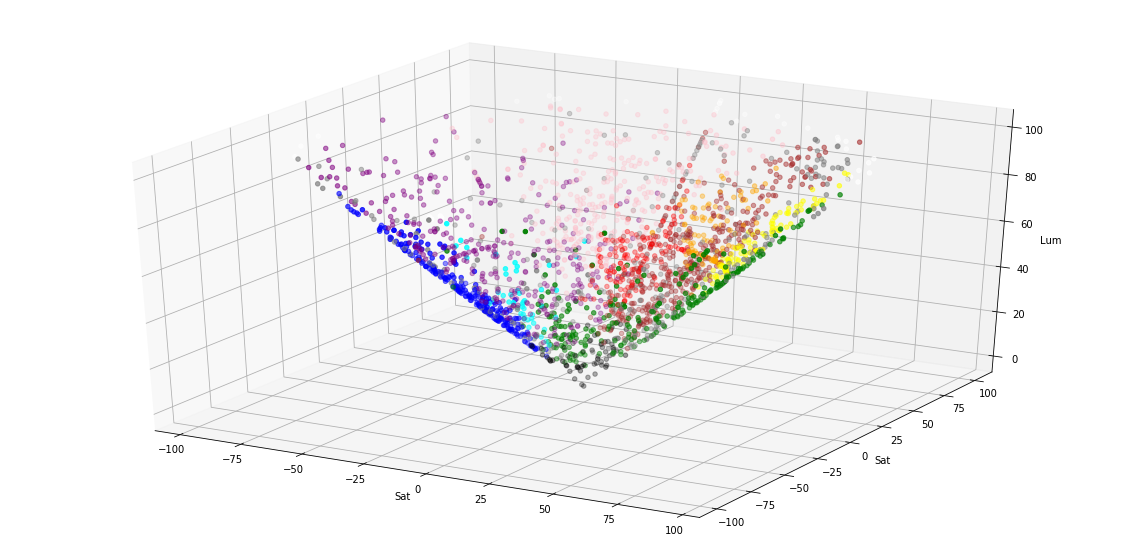

In [11]:
plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
ax.scatter3D(dfColours['X'], dfColours['Y'], dfColours['Lum'], c=dfColours['Name0'])

ax.set_xlabel('Sat')
ax.set_ylabel('Sat')
ax.set_zlabel('Lum')

# Specific colours

In [60]:
dfOrange = dfColours[dfColours['Name0']=='orange']
dfOrange.describe()

,R,G,B,Hue,Sat,Lum
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,245.211268,146.633803,73.619718,0.137363,0.918425,0.622038
std,18.930637,50.397347,66.220490,0.235606,0.143133,0.136795
min,152.000000,16.000000,0.000000,0.000000,0.475728,0.403922
25%,241.000000,107.500000,0.500000,0.052975,0.901059,0.500000
50%,255.000000,153.000000,67.000000,0.083007,1.000000,0.600000
75%,255.000000,189.500000,127.500000,0.101000,1.000000,0.740196
max,255.000000,235.000000,205.000000,0.994048,1.000000,0.901961


In [56]:
dfWhite = dfColours[dfColours['Name0']=='white']
dfWhite.describe()

,R,G,B,Hue,Sat,Lum
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
mean,251.000000,246.571429,242.821429,0.341681,0.853746,0.967367
std,5.340273,6.202918,11.235043,0.345298,0.278015,0.020978
min,240.000000,228.000000,215.000000,0.000000,0.000000,0.911765
25%,247.250000,245.000000,237.750000,0.079657,0.770833,0.963725
50%,255.000000,247.000000,245.000000,0.142361,1.000000,0.970588
75%,255.000000,250.000000,251.000000,0.666667,1.000000,0.978922
max,255.000000,255.000000,255.000000,0.944444,1.000000,1.000000


In [59]:
dfGrey = dfColours[dfColours['Name0']=='gray']
dfGrey.describe()

,R,G,B,Hue,Sat,Lum
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,136.769231,134.487179,137.948718,0.383555,0.112268,0.534540
std,59.090235,62.739592,62.158519,0.363891,0.116860,0.239782
min,26.000000,25.000000,24.000000,0.000000,0.000000,0.111765
25%,83.500000,79.500000,79.000000,0.000000,0.000000,0.327451
50%,132.000000,132.000000,137.000000,0.296296,0.098446,0.513725
75%,192.500000,190.000000,193.000000,0.716667,0.168467,0.753922
max,229.000000,228.000000,226.000000,0.984127,0.440860,0.892157


In [58]:
dfColours['Name0'].unique()

array(['red', 'orange', 'yellow', 'green', 'cyan', 'blue', 'purple',
       'pink', 'white', 'gray', 'black', 'brown'], dtype=object)

In [ ]:
corr_matrix = dfColours.corr()
corr_matrix["Name0"].sort_values(ascending=False)

# Brown colours

In [12]:
dfBrown = dfColours[dfColours['Name0']=='brown']
dfBrown.head()

,Name0,Desc1,Desc2,Name1,HEX,R,G,B,Hue,Sat,Lum,X,Y
6,brown,red,Mostly desaturated dark red,Rose taupe,#905D5D,144,93,93,0.0,21.5,46.5,0.0,46.5
7,brown,red,Dark moderate red,CopperRust,#944747,148,71,71,0.0,35.2,42.9,0.0,42.9
8,brown,red,Mostly desaturated dark red,Pantone,#956666,153,102,102,0.0,18.7,49.2,0.0,49.2
11,brown,red,Mostly desaturated dark red,Copper rose,#996666,149,102,102,0.0,20.0,50.0,0.0,50.0
14,brown,red,Dark red,"Brown,Red brown,Auburn",#A52A2A,165,42,42,0.0,59.4,40.6,0.0,40.6


Text(0.5, 0, 'Lum')

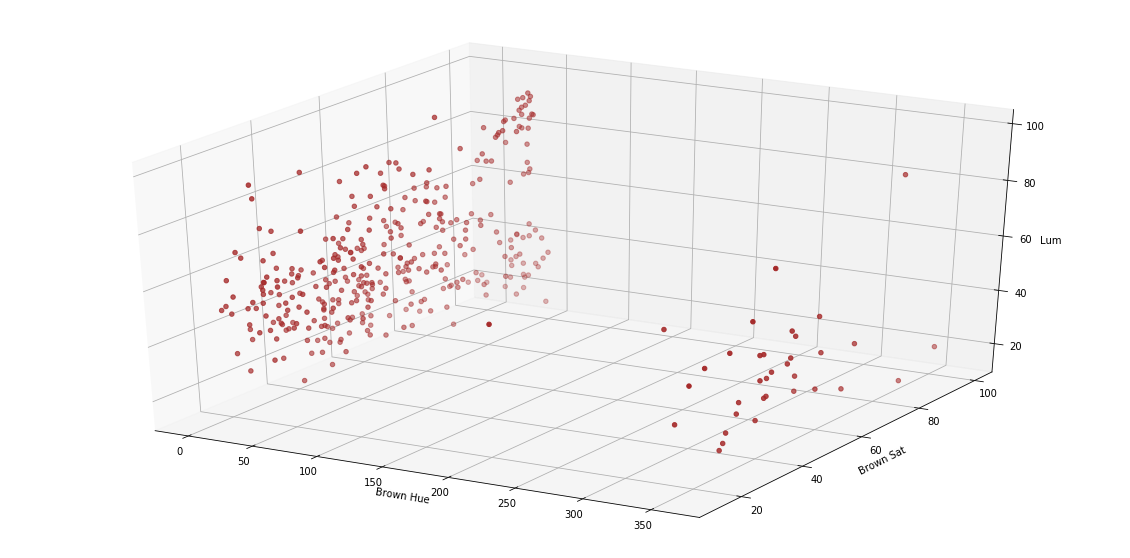

In [13]:
plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
ax.scatter3D(dfBrown['Hue'], dfBrown['Sat'], dfBrown['Lum'], c="brown")

ax.set_xlabel('Brown Hue')
ax.set_ylabel('Brown Sat')
ax.set_zlabel('Lum')

In [14]:
dfBrown.describe()

,R,G,B,Hue,Sat,Lum,X,Y
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,176.460358,114.618926,76.092072,52.255754,59.197954,49.482864,17.634549,43.817944
std,49.377695,55.185520,53.977457,93.338513,24.096972,18.261082,16.516970,16.696677
min,60.000000,0.000000,0.000000,0.000000,13.000000,15.300000,-50.774348,-49.675129
25%,139.000000,69.000000,36.000000,13.000000,39.950000,36.100000,5.318772,31.611546
50%,178.000000,108.000000,63.000000,27.000000,56.600000,47.100000,16.478452,41.928364
75%,218.000000,153.000000,107.000000,36.000000,75.750000,61.600000,27.474166,53.972327
max,255.000000,253.000000,250.000000,359.000000,100.000000,98.800000,69.862150,89.000000


In [64]:
dfBrown['H'] = [(x + 1.0) if x < 0.5 else x for x in dfBrown['Hue'] ]
dfBrown

/Users/choongyuelin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Name0,Name1,Name2,HEX,R,G,B,Hue,Sat,Lum,H
1168,brown,brown,cornsilk,#FFF8DC,255.0,248.0,220.0,0.133333,1.000000,0.931373,1.133333
1169,brown,brown,blanchedalmond,#FFEBCD,255.0,235.0,205.0,0.100000,1.000000,0.901961,1.100000
1170,brown,brown,bisque,#FFE4C4,255.0,228.0,196.0,0.090395,1.000000,0.884314,1.090395
1171,brown,brown,navajowhite,#FFDEAD,255.0,222.0,173.0,0.099593,1.000000,0.839216,1.099593
1172,brown,brown,wheat,#F5DEB3,245.0,222.0,179.0,0.108586,0.767442,0.831373,1.108586
1173,brown,brown,Desertsand,#EDC9Af,237.0,201.0,175.0,0.069892,0.632653,0.807843,1.069892
1174,brown,brown,burlywood,#DEB887,222.0,184.0,135.0,0.093870,0.568627,0.700000,1.093870
1175,brown,brown,Ecru,#CDB891,205.0,184.0,145.0,0.108333,0.375000,0.686275,1.108333
1176,brown,Pale-toneBrown,tan,#D2B48C,210.0,180.0,140.0,0.095238,0.437500,0.686275,1.095238
1177,brown,brown,rosybrown,#BC8F8F,188.0,143.0,143.0,0.000000,0.251397,0.649020,1.000000


In [65]:
dfBrown.describe()

,R,G,B,Hue,Sat,Lum,H
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,170.146667,114.106667,81.260000,0.154637,0.532551,0.490889,1.054637
std,47.688782,54.296989,57.595608,0.268717,0.242466,0.183985,0.059787
min,50.000000,0.000000,0.000000,0.000000,0.104167,0.137255,0.602222
25%,136.250000,69.250000,32.000000,0.037341,0.339489,0.348039,1.024893
50%,175.000000,109.000000,71.500000,0.077951,0.525018,0.473529,1.069327
75%,204.000000,151.750000,113.500000,0.104091,0.707889,0.607843,1.091850
max,255.000000,248.000000,222.000000,0.998382,1.000000,0.931373,1.133333


Text(0,0.5,'Lum')

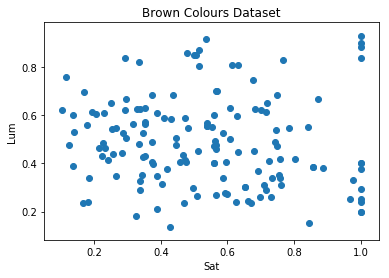

In [37]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(dfBrown['Sat'], dfBrown['Lum'])
# set a title and labels
ax.set_title('Brown Colours Dataset')
ax.set_xlabel('Sat')
ax.set_ylabel('Lum')

In [66]:
dfBrown['Sat'].corr(dfBrown['Lum'])

-0.1065825514464499

In [67]:
dfBrownSat1 = dfBrown[dfBrown['Sat']==1.0]
dfBrownSat1

,Name0,Name1,Name2,HEX,R,G,B,Hue,Sat,Lum,H
1168,brown,brown,cornsilk,#FFF8DC,255.0,248.0,220.0,0.133333,1.0,0.931373,1.133333
1169,brown,brown,blanchedalmond,#FFEBCD,255.0,235.0,205.0,0.100000,1.0,0.901961,1.100000
1170,brown,brown,bisque,#FFE4C4,255.0,228.0,196.0,0.090395,1.0,0.884314,1.090395
1171,brown,brown,navajowhite,#FFDEAD,255.0,222.0,173.0,0.099593,1.0,0.839216,1.099593
1200,brown,Chocolate,DarkChocolate,#7B3F00,123.0,63.0,0.0,0.085366,1.0,0.241176,1.085366
1205,brown,brown,Brown,#964B00,150.0,75.0,0.0,0.083333,1.0,0.294118,1.083333
1219,brown,Tawny,Tenne,#CD5700,205.0,87.0,0.0,0.070732,1.0,0.401961,1.070732
1220,brown,brown,BurntOrange,#CC5500,204.0,85.0,0.0,0.069444,1.0,0.400000,1.069444
1221,brown,brown,Mahogany,#C04000,192.0,64.0,0.0,0.055556,1.0,0.376471,1.055556
1233,brown,DarkBrown,DarkBrown,#663300,102.0,51.0,0.0,0.083333,1.0,0.200000,1.083333


In [68]:
dfBrownSat1.describe()

,R,G,B,Hue,Sat,Lum,H
count,12.000000,12.000000,12.000000,12.000000,12.0,12.000000,12.000000
mean,185.416667,118.500000,67.083333,0.161356,1.0,0.493301,1.078022
std,62.283017,87.734621,97.649148,0.259107,0.0,0.301107,0.035904
min,101.000000,0.000000,0.000000,0.055556,1.0,0.198039,0.981848
25%,126.750000,63.750000,0.000000,0.080183,1.0,0.248529,1.070410
50%,198.000000,80.000000,0.000000,0.084350,1.0,0.388235,1.083333
75%,255.000000,223.500000,178.750000,0.099695,1.0,0.850490,1.092695
max,255.000000,248.000000,220.000000,0.981848,1.0,0.931373,1.133333


In [69]:
dfBrownSat9 = dfBrown[dfBrown['Sat']>0.9]

dfBrownSat9.describe()

,R,G,B,Hue,Sat,Lum,H
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,179.928571,111.785714,57.785714,0.149627,0.996095,0.464566,1.078198
std,59.485569,82.658871,92.881379,0.240208,0.010031,0.286860,0.033079
min,101.000000,0.000000,0.000000,0.055556,0.968992,0.198039,0.981848
25%,127.250000,63.250000,0.000000,0.076833,1.000000,0.251471,1.071715
50%,179.500000,80.000000,1.000000,0.083586,1.000000,0.353922,1.083333
75%,242.500000,188.250000,132.500000,0.097294,1.000000,0.729902,1.089138
max,255.000000,248.000000,220.000000,0.981848,1.000000,0.931373,1.133333


In [70]:
dfBrownHue98 = dfBrown[dfBrown['H']>0.98]
dfBrownHue98.describe()

,R,G,B,Hue,Sat,Lum,H
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,171.783217,115.223776,79.538462,0.118448,0.543164,0.492212,1.062504
std,47.567467,54.929458,57.577598,0.215966,0.242482,0.186722,0.039374
min,50.000000,0.000000,0.000000,0.000000,0.104167,0.137255,0.981481
25%,137.000000,70.000000,30.500000,0.036353,0.345776,0.347059,1.029520
50%,178.000000,109.000000,71.000000,0.074667,0.539823,0.474510,1.069892
75%,205.000000,153.000000,109.000000,0.100000,0.714286,0.613725,1.094371
max,255.000000,248.000000,222.000000,0.998382,1.000000,0.931373,1.133333


In [72]:
dfBrownHue98['Sat'].corr(dfBrownHue98['Lum'])

-0.11153719927746157

Text(0,0.5,'Lum')

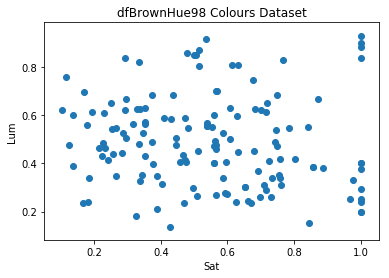

In [73]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(dfBrownHue98['Sat'], dfBrownHue98['Lum'])
# set a title and labels
ax.set_title('dfBrownHue98 Colours Dataset')
ax.set_xlabel('Sat')
ax.set_ylabel('Lum')

In [108]:
dfTest = dfColours[dfColours['Hue']>0.98].append(dfColours[dfColours['Hue']<0.134])
dfTest.describe()

,R,G,B,Hue,Sat,Lum,X,Y
count,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000
mean,201.677333,131.357333,96.029333,0.167719,0.665839,0.581903,0.179536,0.529023
std,52.805514,68.513985,73.295036,0.302134,0.307701,0.211267,0.178247,0.198610
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.086888,0.000000
25%,166.000000,76.000000,32.000000,0.024936,0.438988,0.429412,0.011814,0.379361
50%,217.000000,129.000000,87.000000,0.069892,0.714286,0.552941,0.140055,0.501961
75%,251.500000,189.500000,154.500000,0.108206,0.996032,0.748039,0.305305,0.684107
max,255.000000,255.000000,255.000000,0.999042,1.000000,1.000000,0.692145,1.000000


Text(0.5,0,'Lum')

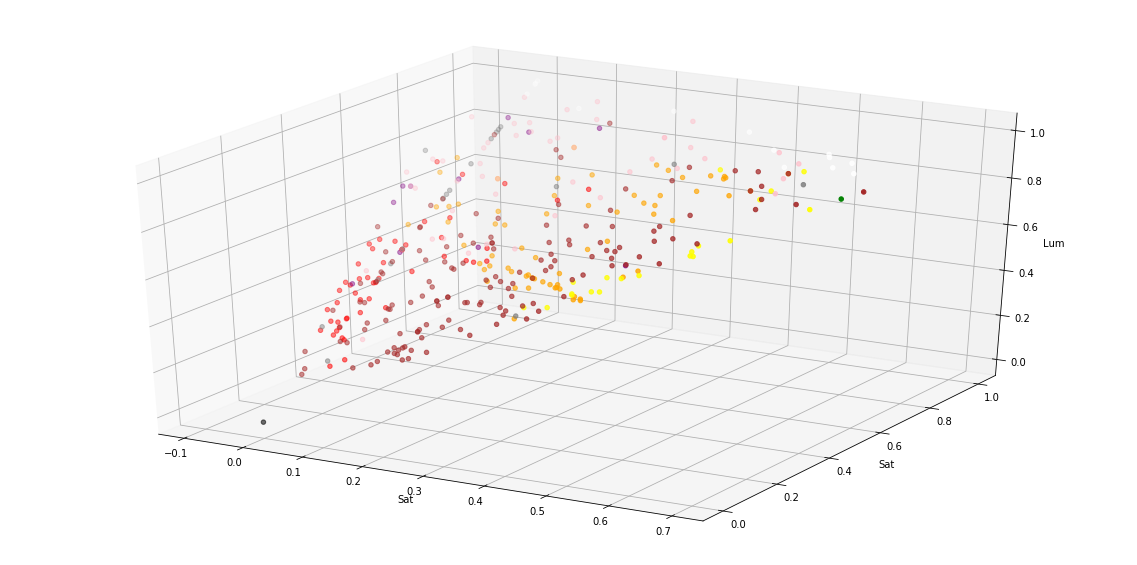

In [109]:
plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
ax.scatter3D(dfTest['X'], dfTest['Y'], dfTest['Lum'], c=dfTest['Name0'])

ax.set_xlabel('Sat')
ax.set_ylabel('Sat')
ax.set_zlabel('Lum')

In [79]:
dfTest['H'] = [(x + 1.0) if x < 0.5 else x for x in dfTest['Hue'] ]
dfTest.head()

,Name0,Name1,Name2,HEX,R,G,B,Hue,Sat,Lum,H
30,red,red,RoyalMaroon,#5A3839,90.0,56.0,57.0,0.995098,0.232877,0.286275,0.995098
37,red,red,PaleMediumCarminePink,#EA9399,234.0,147.0,153.0,0.988506,0.674419,0.747059,0.988506
58,red,red,DeepCarmineRed,#BC3F4A,188.0,63.0,74.0,0.985333,0.498008,0.492157,0.985333
61,red,red,JapaneseCarmine,#9D2933,157.0,41.0,51.0,0.985632,0.585859,0.388235,0.985632
64,red,red,Sangria,#92000A,146.0,0.0,10.0,0.988584,1.000000,0.286275,0.988584


In [83]:
dfTestSat9 = dfTest[dfTest['Sat']>0.96]
dfTestSat9.describe()

,R,G,B,Hue,Sat,Lum,H
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,235.846847,144.693694,89.594595,0.132486,0.996595,0.636513,1.060414
std,42.914968,78.498384,91.259109,0.242315,0.008587,0.228689,0.042998
min,99.000000,0.000000,0.000000,0.000000,0.961290,0.194118,0.981758
25%,254.000000,85.000000,0.000000,0.040790,1.000000,0.500000,1.026056
50%,255.000000,153.000000,64.000000,0.077778,1.000000,0.625490,1.066667
75%,255.000000,218.500000,177.000000,0.100926,1.000000,0.845098,1.091019
max,255.000000,251.000000,251.000000,0.999042,1.000000,0.992157,1.133333


In [88]:
dfTestSat9.sort_values(['H'], inplace=True)

/Users/choongyuelin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [89]:
dfTestSat9.to_csv("TestBrownish.csv")

In [90]:
dfTestSat9.sort_values(['Lum'], inplace=True)
dfTestSat9.to_csv("TestBrownishLum.html")

/Users/choongyuelin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [91]:
dfTestLum41 = dfTest[dfTest['Lum']<0.41]
dfTestLum41.sort_values(['Sat'], inplace=True)

dfTestLum41.to_csv("TestBrownishSat.html")

/Users/choongyuelin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
